In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
TempLJ = pd.read_csv("../Podatki/Temp_LJ.csv")

In [3]:
TempLJ.rename(columns={"LETO": "Leto", "MESEC": "Mesec", "TEMPERATURA": "Temperatura"}, inplace=True)

In [4]:
n = len(TempLJ)
Zapored = []

for i in range(n):
    Zapored.append(i)


In [5]:
TempLJ["KateriMesec"] = Zapored

In [6]:
TempLJ

,Leto,Mesec,Temperatura,KateriMesec
0,1986,1,0.1,0
1,1986,2,-2.8,1
2,1986,3,3.2,2
3,1986,4,10.2,3
4,1986,5,17.6,4
...,...,...,...,...
415,2020,8,22.2,415
416,2020,9,17.5,416
417,2020,10,11.9,417
418,2020,11,5.3,418


https://towardsdatascience.com/machine-learning-for-biomedical-data-linear-regression-7d43461cdfa9

In [8]:
X = np.asarray(TempLJ.KateriMesec.values)
y = np.asarray(TempLJ.Temperatura.values)

In [9]:
def FeatureScalingNormalization(X):
    # Initialize the following variables:
    # Make a copy of the X vector and call it X_norm
    X_norm = X 

    # mu: It will contain the average 
    # value of X in training set.
    mu = np.zeros(X.shape[0]) 

    # sigma: It will contain the Range(max-min)
    # of X or Standard Deviation
    sigma = np.zeros(X.shape[0]) 

    mu = X.mean()
    # The Standard Deviation calculation with NumPy,
    # requires the argument "degrees of freedom" = 1
    sigma = X.std(ddof=1)

    # number of training examples
    m = X.shape[0] 
    
    # Make a vector of size m with the mu values
    mu_matrix = np.multiply(np.ones(m), mu).T 
    
    # Make a vector of size m with the sigma values    
    sigma_matrix = np.multiply(np.ones(m), sigma).T
    
    # Apply the Feature Scaling Normalization formula
    X_norm = np.subtract(X, mu).T
    X_norm = X_norm /sigma.T
    
    return [X_norm, mu, sigma]

In [10]:
# Normalize X using the FeatureScalingNormalization() function, and 
# copy the results in the "featuresNormalizeresults" list
featuresNormalizeresults = FeatureScalingNormalization(X)

# get the normalized X matrix
X = np.asarray(featuresNormalizeresults[0]).T

# get the mean
mu = featuresNormalizeresults[1]

# get the sigma
sigma = featuresNormalizeresults[2]

In [11]:
# Add a column of ones to the matrix X

m = len(y) # number of training examples
X = np.vstack((np.ones(m), X.T)).T

Text(0, 0.5, 'Temperatura')

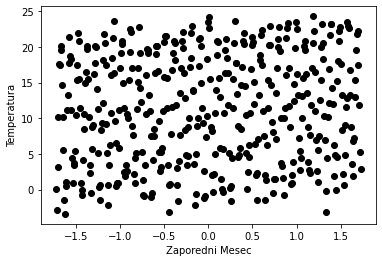

In [12]:
# Plot the data (plt is a matplotlib object)
plt.scatter(X[:,[1]], y,  color='black') 

# Put labels
plt.xlabel("Zaporedni Mesec")
plt.ylabel("Temperatura")